<a href="https://colab.research.google.com/github/Marzerp/Pokemon_Statistics/blob/main/Analisis_Pok%C3%A9mon_Anteproyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install marimo
import marimo as mo

#Proyecto de Análisis de Datos de Pokémon


### Autores:
#####Araceli Romero, Daniel Rangel

### Fecha:
##### Abril 2025

##Descripción:
#####Este proyecto realiza una limpieza, análisis descriptivo, muestreo y pruebas estadísticas sobre un dataset de Pokémon. Se analizan principalmente las variables 'HP' y 'Speed' por tipo y generación.


# 1. Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,ttest_1samp, skew, norm
from google.colab import drive
from google.colab import files

# 2. Limpieza de datos

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Leer el dataset
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pokemon.csv")

In [ ]:
# Revisar información inicial del dataset
df.info()
df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   total       1072 non-null   object
 4   hp          1072 non-null   int64 
 5   attack      1072 non-null   int64 
 6   defense     1072 non-null   int64 
 7   sp_attack   1072 non-null   int64 
 8   sp_defense  1072 non-null   int64 
 9   speed       1072 non-null   int64 
 10  generation  1072 non-null   int64 
 11  legendary   1072 non-null   bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 93.3+ KB


1072

In [ ]:
# Limpiar la columna 'total' y corregir nombres de columnas
df['total'] = df['total'].str.replace(',','').astype(int)
df = df.rename(columns={'type1': 'type'})

df.info()
df.groupby('generation').size()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1072 non-null   int64 
 1   name        1072 non-null   object
 2   type        1072 non-null   object
 3   total       1072 non-null   int64 
 4   hp          1072 non-null   int64 
 5   attack      1072 non-null   int64 
 6   defense     1072 non-null   int64 
 7   sp_attack   1072 non-null   int64 
 8   sp_defense  1072 non-null   int64 
 9   speed       1072 non-null   int64 
 10  generation  1072 non-null   int64 
 11  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(2)
memory usage: 93.3+ KB


,0
generation,
0,3
1,178
2,106
3,160
4,121
5,166
6,85
7,114
8,139


In [ ]:
# Corregir errores en 'generation' y en los nombres de 'type'
df.loc[df['generation'] == 0, 'generation'] = 7   # Cambiar todos los que tienen generación 0 a generación 7
df['type'] = df['type'].str.replace('Graaass', 'Grass')
df['type'] = df['type'].str.replace('Graass', 'Grass')
df['type'] = df['type'].str.replace('Blastoise', 'Water')
df['type'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], dtype=object)

In [ ]:
# Guardar dataset limpio
df.to_excel('/content/drive/MyDrive/Colab Notebooks/Pokemon_limpio.xlsx', index=False)
files.download('/content/drive/MyDrive/Colab Notebooks/Pokemon_limpio.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#3. Presentación de los datos

In [ ]:
# Cantidad de Pokémon por generación
generation = df.groupby('generation').size()
generation

,0
generation,
1,178
2,106
3,160
4,121
5,166
6,85
7,117
8,139


In [ ]:
# Clasificación manual de tipos de variable
tipos_variable = {
    'id': 'Cuantitativa discreta',
    'name': 'Cualitativa nominal',
    'type': 'Cualitativa nominal',
    'total': 'Cuantitativa discreta',
    'hp': 'Cuantitativa discreta',
    'attack': 'Cuantitativa discreta',
    'defense': 'Cuantitativa discreta',
    'sp_attack': 'Cuantitativa discreta',
    'sp_defense': 'Cuantitativa discreta',
    'speed': 'Cuantitativa discreta',
    'generation': 'Cualitativa nominal',
    'legendary': 'Cualitativa nominal'
}

# Cantidad de datos por variable
cantidad_datos = df.count()

In [ ]:
# Crear tabla de resumen
tabla_variables = pd.DataFrame({
    'Variable': cantidad_datos.index,
    'Cantidad de datos': cantidad_datos.values,
    'Tipo de variable': [tipos_variable[col] for col in cantidad_datos.index]
})
tabla_variables

,Variable,Cantidad de datos,Tipo de variable
0,id,1072,Cuantitativa discreta
1,name,1072,Cualitativa nominal
2,type,1072,Cualitativa nominal
3,total,1072,Cuantitativa discreta
4,hp,1072,Cuantitativa discreta
5,attack,1072,Cuantitativa discreta
6,defense,1072,Cuantitativa discreta
7,sp_attack,1072,Cuantitativa discreta
8,sp_defense,1072,Cuantitativa discreta
9,speed,1072,Cuantitativa discreta


# 4. Estadística descriptiva

In [ ]:
# Dividir datos por tipo y generación
df_tierra = df[df['type'] == 'Ground']
df_rayo = df[df['type'] == 'Electric']

df_gen1 = df[df['generation'] == 1]
df_gen2 = df[df['generation'] == 2]
df_gen3 = df[df['generation'] == 3]
df_gen4 = df[df['generation'] == 4]
df_gen5 = df[df['generation'] == 5]
df_gen6 = df[df['generation'] == 6]
df_gen7 = df[df['generation'] == 7]
df_gen8 = df[df['generation'] == 8]

generaciones = {i: df[df['generation'] == i] for i in range(1, 9)}

In [ ]:
# Función para calcular resumen estadístico
def resumen_estadistico(df):
  re = pd.DataFrame({
    'Media': df.mean(),
    'Mediana': df.median(),
    'Moda': df.mode().iloc[0],
    'Desviación estándar': df.std(ddof=1),
    'Varianza': df.var(ddof=1),
    'Mínimo': df.min(),
    'Máximo': df.max(),
    'Asimetría': df.apply(skew)
  })
  return re.round(2)

In [ ]:
# Seleccionar las variables que vamos a analizar
tierra = df_tierra[['hp', 'speed']]
rayo = df_rayo[['hp', 'speed']]
df_gen1 = df_gen1[['hp', 'speed']]
df_gen2 = df_gen2[['hp', 'speed']]
df_gen3 = df_gen3[['hp', 'speed']]
df_gen4 = df_gen4[['hp', 'speed']]
df_gen5 = df_gen5[['hp', 'speed']]
df_gen6 = df_gen6[['hp', 'speed']]
df_gen7 = df_gen7[['hp', 'speed']]
df_gen8 = df_gen8[['hp', 'speed']]

# Aplicar resumen para diferentes subconjuntosre_tierra=resumen_estadistico(tierra)
re_rayo=resumen_estadistico(rayo)
re_gen1=resumen_estadistico(df_gen1)
re_gen2=resumen_estadistico(df_gen2)
re_gen3=resumen_estadistico(df_gen3)
re_gen4=resumen_estadistico(df_gen4)
re_gen5=resumen_estadistico(df_gen5)
re_gen6=resumen_estadistico(df_gen6)
re_gen7=resumen_estadistico(df_gen7)
re_gen8=resumen_estadistico(df_gen8)


---
 - Datos estadísticos Pokemones de Tierra:

In [ ]:
re_tierra

,Media,Mediana,Moda,Desviación estándar,Varianza,Mínimo,Máximo,Asimetría
hp,70.88,71.0,50.0,26.86,721.62,10,115,-0.27
speed,62.02,60.0,40.0,27.47,754.80,10,120,0.22


---
 - Datos estadísticos Pokemones de Tipo Rayo:

In [ ]:
re_rayo

,Media,Mediana,Moda,Desviación estándar,Varianza,Mínimo,Máximo,Asimetría
hp,62.29,60.0,50,17.20,295.95,20,90,-0.19
speed,85.94,90.0,86,31.96,1021.51,15,200,0.46


---
 - Datos estadísticos Pokemones de Generacion 1:

In [ ]:
re_gen1

,Media,Mediana,Moda,Desviación estándar,Varianza,Mínimo,Máximo,Asimetría
hp,66.56,62.0,65,28.79,828.84,10,250,1.99
speed,72.71,70.0,90,29.18,851.70,15,150,0.37


---
 - Datos estadísticos Pokemones de Generacion 2:

In [ ]:
re_gen2

,Media,Mediana,Moda,Desviación estándar,Varianza,Mínimo,Máximo,Asimetría
hp,71.21,70.0,75,30.59,935.71,20,255,2.53
speed,61.81,60.5,85,27.26,743.28,5,130,0.18


---
 - Datos estadísticos Pokemones de Generacion 3:

In [ ]:
re_gen3

,Media,Mediana,Moda,Desviación estándar,Varianza,Mínimo,Máximo,Asimetría
hp,66.54,65.0,70,24.06,578.87,1,170,0.95
speed,66.92,65.0,50,31.33,981.69,10,180,0.75


---
 - Datos estadísticos Pokemones de Generacion 4:

In [ ]:
re_gen4

,Media,Mediana,Moda,Desviación estándar,Varianza,Mínimo,Máximo,Asimetría
hp,73.08,70.0,60.0,25.11,630.69,20,150,0.82
speed,71.34,77.0,60.0,28.48,810.83,5,135,-0.06


---
 - Datos estadísticos Pokemones de Generacion 5:

In [ ]:
print("Resumen generacion 5:")
re_gen5

Resumen generacion 5:


,Media,Mediana,Moda,Desviación estándar,Varianza,Mínimo,Máximo,Asimetría
hp,71.84,70.0,75.0,22.35,499.47,30,165,0.79
speed,68.12,65.0,60.0,28.64,820.51,10,145,0.13


---
 - Datos estadísticos Pokemones de Generacion 6:

In [ ]:
print("Resumen generacion 6:")
re_gen6

Resumen generacion 6:


,Media,Mediana,Moda,Desviación estándar,Varianza,Mínimo,Máximo,Asimetría
hp,69.88,65.0,50.0,26.10,681.30,38,216,2.4
speed,68.00,62.0,60.0,26.78,717.38,23,132,0.5


---
 - Datos estadísticos Pokemones de Generacion 7:

In [ ]:
re_gen7

,Media,Mediana,Moda,Desviación estándar,Varianza,Mínimo,Máximo,Asimetría
hp,70.35,70.0,75,27.64,763.83,10,223,1.75
speed,67.51,65.0,45,31.25,976.53,5,151,0.40


---
 - Datos estadísticos Pokemones de Generacion 8:

In [ ]:
re_gen8

,Media,Mediana,Moda,Desviación estándar,Varianza,Mínimo,Máximo,Asimetría
hp,76.12,70.0,70.0,29.66,879.60,25,255,2.06
speed,71.40,70.0,30.0,34.81,1211.59,10,200,0.62


In [ ]:
# Aplicar resumen para diferentes subconjuntos
# De manera más corta
for nombre, data in [('Tierra', df_tierra), ('Rayo', df_rayo)] + [(f'Gen {i}', generaciones[i]) for i in range(1, 9)]:
    subset = data[['hp', 'speed']]
    print(f"Resumen estadístico - {nombre}")
    print(resumen_estadistico(subset))
    print("\n")

Resumen estadístico - Tierra
       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     70.88     71.0  50.0                26.86    721.62      10     115   
speed  62.02     60.0  40.0                27.47    754.80      10     120   

       Asimetría  
hp         -0.27  
speed       0.22  


Resumen estadístico - Rayo
       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     62.29     60.0    50                17.20    295.95      20      90   
speed  85.94     90.0    86                31.96   1021.51      15     200   

       Asimetría  
hp         -0.19  
speed       0.46  


Resumen estadístico - Gen 1
       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     66.56     62.0    65                28.79    828.84      10     250   
speed  72.71     70.0    90                29.18    851.70      15     150   

       Asimetría  
hp          1.99  
speed       0.37  


Resumen estadístico - Gen 2
      

# 5. Gráficas descriptivas

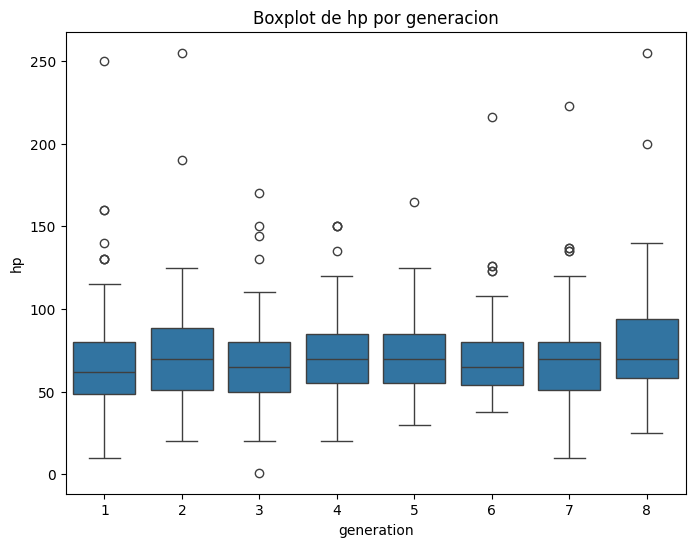

In [ ]:
# Boxplot de HP por generación
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='generation', y='hp')
plt.title('Boxplot de hp por generacion')
plt.show()


In [ ]:
variables_cuanti = df[['hp', 'speed']]
resumen = resumen_estadistico(variables_cuanti)
print(resumen)

       Media  Mediana  Moda  Desviación estándar  Varianza  Mínimo  Máximo  \
hp     70.49     68.0  60.0                26.87    721.89       1     255   
speed  68.79     65.0  50.0                30.08    904.58       5     200   

       Asimetría  
hp          1.76  
speed       0.42  


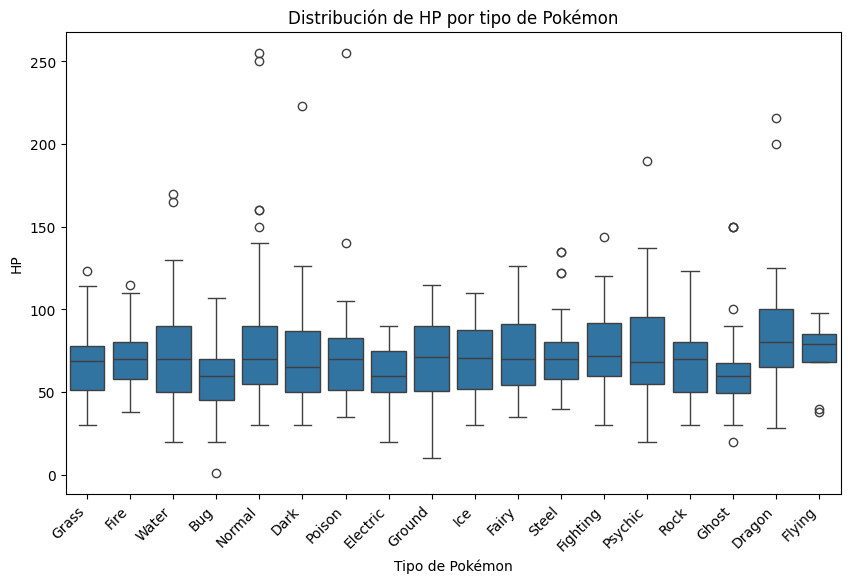

In [ ]:
# Boxplot de HP por tipo de Pokémon
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type', y='hp')
plt.title('Distribución de HP por tipo de Pokémon')
plt.xlabel('Tipo de Pokémon')
plt.ylabel('HP')
plt.xticks(rotation=45, ha='right')
plt.show()

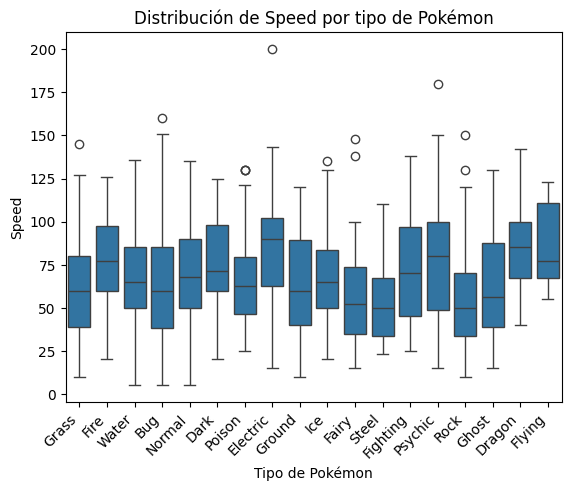

In [ ]:
# Boxplot de velocidad por tipo de Pokémonplt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type', y='speed')
plt.title('Distribución de Speed por tipo de Pokémon')
plt.xlabel('Tipo de Pokémon')
plt.ylabel('Speed')
plt.xticks(rotation=45, ha='right')
plt.show()

# 6. Muestreo e intervalos de confianza

In [ ]:
df_gen1 = df[df['generation'] == 1]
df_gen2 = df[df['generation'] == 2]
df_gen3 = df[df['generation'] == 3]
df_gen4 = df[df['generation'] == 4]
df_gen5 = df[df['generation'] == 5]
df_gen6 = df[df['generation'] == 6]
df_gen7 = df[df['generation'] == 7]
df_gen8 = df[df['generation'] == 8]

In [ ]:
# Función para calcular intervalos de confianza
def intervalo_confianza(muestra, nivel):
    n = len(muestra)
    media = np.mean(muestra)
    std = np.std(muestra, ddof=1)
    z = norm.ppf(1 - (1 - nivel) / 2)
    margen_error = z * (std / np.sqrt(n))
    return round(media - margen_error, 2), round(media + margen_error, 2)

In [ ]:
# Muestreo aleatorio simple de tamaño 30
muestra_aleatoria_gen1 = df_gen1['speed'].sample(n=30, random_state=2)
#muestra_aleatoria_gen1 = pd.DataFrame(muestra_aleatoria_gen1)
muestra_aleatoria_gen1

,speed
12,58
23,145
192,30
25,71
37,90
13,78
77,55
200,50
134,42
54,100


In [ ]:
# Muestreo estratificado por tipo
tipos = df_gen1['type'].value_counts(normalize=True)
muestra_por_tipo = (tipos * 30).round().astype(int)

ajuste = 30 - muestra_por_tipo.sum()
if ajuste != 0:
    muestra_por_tipo.iloc[0] += ajuste

muestra_estratificada_gen1 = pd.Series(dtype=int)
for tipo, n in muestra_por_tipo.items():
    subset = df_gen1[df_gen1['type'] == tipo]['speed']
    muestra = subset.sample(n=n, random_state=42)
    muestra_estratificada_gen1 = pd.concat([muestra_estratificada_gen1, muestra])

#muestra_estratificada_gen1 = pd.DataFrame(muestra_estratificada_gen1)
muestra_estratificada_gen1

,0
120,45
136,50
164,115
163,85
84,90
56,20
116,60
57,45
179,48
24,56


# 7. Tabla de frecuencias y resumen



- Muestra aleatoria

In [ ]:
freq_abs = muestra_aleatoria_gen1.value_counts().sort_index()
freq_rel = freq_abs / len(muestra_aleatoria_gen1)
freq_rel_acum = freq_rel.cumsum()
z_scores_aleatoria = zscore(muestra_aleatoria_gen1)

tabla_aleatoria = pd.DataFrame({
    'Speed': freq_abs.index,
    'Frecuencia absoluta': freq_abs.values,
    'Frecuencia relativa': freq_rel.values.round(4),
    'Frecuencia relativa acumulada': freq_rel_acum.values.round(4)
})
tabla_z_aleatoria = pd.DataFrame({'Speed': muestra_aleatoria_gen1.values, 'Z': z_scores_aleatoria})
tabla_z_aleatoria = tabla_z_aleatoria.groupby('Speed').agg({'Z': 'mean'}).reset_index()
tabla_aleatoria_final = pd.merge(tabla_aleatoria, tabla_z_aleatoria, on='Speed')
tabla_aleatoria_final

,Speed,Frecuencia absoluta,Frecuencia relativa,Frecuencia relativa acumulada,Z
0,30,4,0.1333,0.1333,-1.238557
1,35,2,0.0667,0.2000,-1.062292
2,40,1,0.0333,0.2333,-0.886027
3,42,1,0.0333,0.2667,-0.815521
4,45,1,0.0333,0.3000,-0.709762
5,50,3,0.1000,0.4000,-0.533496
6,55,1,0.0333,0.4333,-0.357231
7,56,1,0.0333,0.4667,-0.321978
8,58,1,0.0333,0.5000,-0.251472
9,65,2,0.0667,0.5667,-0.004700




*   Muestra estratificada



In [ ]:
freq_abs_est = muestra_estratificada_gen1.value_counts().sort_index()
freq_rel_est = freq_abs_est / len(muestra_estratificada_gen1)
freq_rel_acum_est = freq_rel_est.cumsum()
z_scores_est = zscore(muestra_estratificada_gen1)

tabla_estratificada = pd.DataFrame({
    'Speed': freq_abs_est.index,
    'Frecuencia absoluta': freq_abs_est.values,
    'Frecuencia relativa': freq_rel_est.values.round(4),
    'Frecuencia relativa acumulada': freq_rel_acum_est.values.round(4)
})
tabla_z_est = pd.DataFrame({'Speed': muestra_estratificada_gen1.values, 'Z': z_scores_est})
tabla_z_est = tabla_z_est.groupby('Speed').agg({'Z': 'mean'}).reset_index()
tabla_estratificada_final = pd.merge(tabla_estratificada, tabla_z_est, on='Speed')
tabla_estratificada_final

,Speed,Frecuencia absoluta,Frecuencia relativa,Frecuencia relativa acumulada,Z
0,20,1,0.0333,0.0333,-1.765910
1,30,1,0.0333,0.0667,-1.418746
2,35,1,0.0333,0.1000,-1.245164
3,40,1,0.0333,0.1333,-1.071581
4,45,3,0.1000,0.2333,-0.897999
5,48,1,0.0333,0.2667,-0.793850
6,50,3,0.1000,0.3667,-0.724417
7,55,1,0.0333,0.4000,-0.550834
8,56,1,0.0333,0.4333,-0.516118
9,60,1,0.0333,0.4667,-0.377252


In [ ]:
resumen_aleatoria = resumen_estadistico(muestra_aleatoria_gen1.to_frame())
resumen_estratificada = resumen_estadistico(muestra_estratificada_gen1.to_frame())

resumen_aleatoria
resumen_estratificada

,Media,Mediana,Moda,Desviación estándar,Varianza,Mínimo,Máximo,Asimetría
0,70.87,65.0,90,29.3,858.33,20,130,0.34


# 8. Graficas descriptivas

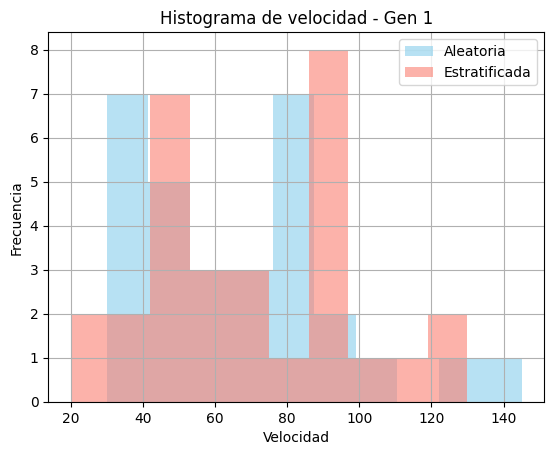

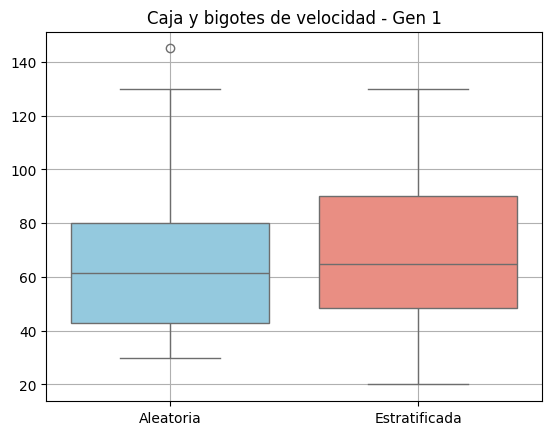

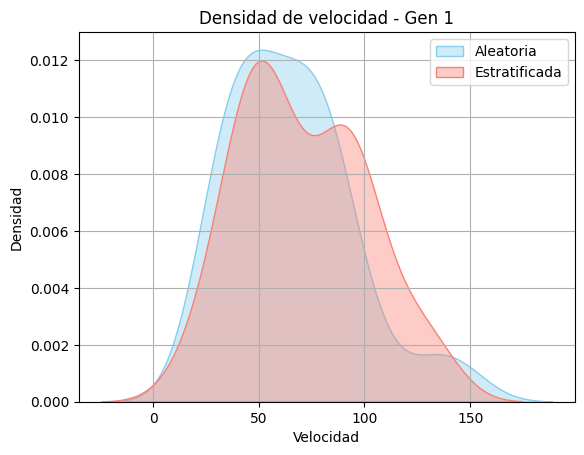

In [ ]:
# Histograma
plt.hist(muestra_aleatoria_gen1, bins=10, alpha=0.6, label='Aleatoria', color='skyblue')
plt.hist(muestra_estratificada_gen1, bins=10, alpha=0.6, label='Estratificada', color='salmon')
plt.title('Histograma de velocidad - Gen 1')
plt.xlabel('Velocidad')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

# Caja y bigotes
sns.boxplot(data=[muestra_aleatoria_gen1.values, muestra_estratificada_gen1.values], palette=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Aleatoria', 'Estratificada'])
plt.title('Caja y bigotes de velocidad - Gen 1')
plt.grid(True)
plt.show()


#9. Intervalos de confianza para la media

In [ ]:
niveles = [0.85, 0.95, 0.99]

# Aleatoria
ics_aleatoria = {f"{int(n*100)}%": intervalo_confianza(muestra_aleatoria_gen1, n) for n in niveles}
ic_aleatoria_df = pd.DataFrame.from_dict(ics_aleatoria, orient='index', columns=['Inferior', 'Superior'])

# Estratificada
ics_estratificada = {f"{int(n*100)}%": intervalo_confianza(muestra_estratificada_gen1, n) for n in niveles}
ic_estratificada_df = pd.DataFrame.from_dict(ics_estratificada, orient='index', columns=['Inferior', 'Superior'])

ic_aleatoria_df
ic_estratificada_df

,Inferior,Superior
85%,63.17,78.57
95%,60.38,81.35
99%,57.09,84.64


#10. Prueba de hipótesis sobre la media

In [ ]:
# Calcular la media real de todos los Pokémon de Gen 1
media_real_gen1 = df_gen1['speed'].mean()

# Prueba t para la muestra aleatoria
t_aleatoria, p_aleatoria = ttest_1samp(muestra_aleatoria_gen1, media_real_gen1)

# Prueba t para la muestra estratificada
t_estratificada, p_estratificada = ttest_1samp(muestra_estratificada_gen1, media_real_gen1)

# Resultados como diccionario
hipotesis_aleatoria = {
    'Media real Gen 1': round(media_real_gen1, 2),
    'Media muestra aleatoria': round(muestra_aleatoria_gen1.mean(), 2),
    'Valor p': round(p_aleatoria, 4),
    'Conclusión': "Se rechaza H0" if p_aleatoria < 0.05 else "No se rechaza H0"
}

hipotesis_estratificada = {
    'Media real Gen 1': round(media_real_gen1, 2),
    'Media muestra estratificada': round(muestra_estratificada_gen1.mean(), 2),
    'Valor p': round(p_estratificada, 4),
    'Conclusión': "Se rechaza H0" if p_estratificada < 0.05 else "No se rechaza H0"
}
print("Hipótesis aleatoria:")

print("p= 0.05")
for key, value in hipotesis_aleatoria.items():
    print(f"{key}: {value}")
    print()

print("Hipótesis estratificada:")
for key, value in hipotesis_estratificada.items():
    print(f"{key}: {value}")
    print()

Hipótesis aleatoria:
p= 0.05
Media real Gen 1: 72.71

Media muestra aleatoria: 65.13

Valor p: 0.1611

Conclusión: No se rechaza H0

Hipótesis estratificada:
Media real Gen 1: 72.71

Media muestra estratificada: 70.87

Valor p: 0.7332

Conclusión: No se rechaza H0



In [ ]:
niveles = [0.85, 0.95, 0.99]

# Prueba de hipótesis sobre la media (adaptado)
# Calcular la media real de todos los Pokémon de Gen 1
media_real_gen1 = df_gen1['speed'].mean()

# Prueba t para la muestra aleatoria
t_aleatoria, p_aleatoria = ttest_1samp(muestra_aleatoria_gen1, media_real_gen1)

# Prueba t para la muestra estratificada
t_estratificada, p_estratificada = ttest_1samp(muestra_estratificada_gen1, media_real_gen1)


# Función para mostrar los resultados de la prueba de hipótesis
def mostrar_resultados_hipotesis(nombre_muestra, media_muestra, p_valor, nivel):
    print(f"Hipótesis {nombre_muestra}:")
    print(f"Media real Gen 1: {round(media_real_gen1, 2)}")
    print(f"Media {nombre_muestra}: {round(media_muestra, 2)}")
    print(f"Valor p: {round(p_valor, 4)}")
    print(f"Conclusión: {'Se rechaza H0' if p_valor < 1.0-nivel else 'No se rechaza H0'}")
    print()

# Mostrar resultados para cada nivel de confianza
for nivel in niveles:
    print(f"Nivel de confianza: {int(nivel*100)}%")

    mostrar_resultados_hipotesis("aleatoria", muestra_aleatoria_gen1.mean(), p_aleatoria, nivel)
    mostrar_resultados_hipotesis("estratificada", muestra_estratificada_gen1.mean(), p_estratificada, nivel)


Nivel de confianza: 85%
Hipótesis aleatoria:
Media real Gen 1: 72.71
Media aleatoria: 65.13
Valor p: 0.1611
Conclusión: No se rechaza H0

Hipótesis estratificada:
Media real Gen 1: 72.71
Media estratificada: 70.87
Valor p: 0.7332
Conclusión: No se rechaza H0

Nivel de confianza: 95%
Hipótesis aleatoria:
Media real Gen 1: 72.71
Media aleatoria: 65.13
Valor p: 0.1611
Conclusión: No se rechaza H0

Hipótesis estratificada:
Media real Gen 1: 72.71
Media estratificada: 70.87
Valor p: 0.7332
Conclusión: No se rechaza H0

Nivel de confianza: 99%
Hipótesis aleatoria:
Media real Gen 1: 72.71
Media aleatoria: 65.13
Valor p: 0.1611
Conclusión: No se rechaza H0

Hipótesis estratificada:
Media real Gen 1: 72.71
Media estratificada: 70.87
Valor p: 0.7332
Conclusión: No se rechaza H0

